In [55]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [56]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.ticker import (NullFormatter, ScalarFormatter)
import matplotlib.dates as mdates
from netCDF4 import Dataset
from wrf import  ALL_TIMES
import matplotlib.dates as mdates

In [57]:

from matplotlib.colors import from_levels_and_colors
import cartopy.crs as ccrs
import cartopy.feature as cf
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross, ll_to_xy,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair, destagger, 
                 interplevel)

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cartopy.feature as cfe
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [134]:

# Specify the directory path containing the wrfout files
directory = '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2'

# Get a list of wrfout files in the directory
wrf_files = sorted(glob.glob(directory + '/wrfout_d02*'))

wrf_in = []
for file in wrf_files:
    wrf_in.append(Dataset(file))
    
p = getvar(wrf_in, "T2", timeidx=ALL_TIMES, method="cat")

lat1 = 43.0
lat2 = 44.0
lon1 = -116.0
lon2 = -116.0


In [135]:

x1, y1 = to_np(ll_to_xy(wrf_in, lat1, lon1))
x2, y2 = to_np(ll_to_xy(wrf_in, lat2, lon2))

In [136]:
p = p.sel(south_north=y1, west_east=x1)

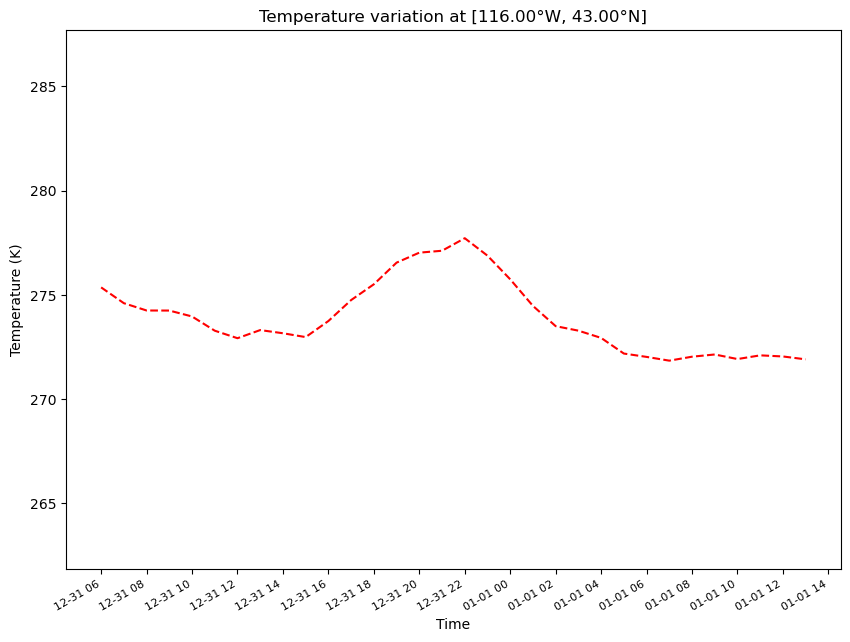

In [168]:
# Plot the line
p.plot.line('--', color='red', figsize=(10, 7))


# Customize x-axis labels

plt.xlabel('Time')
plt.ylabel('Temperature (K)')

# Set the y-axis limits
plt.ylim(p.min() - 10,p.max() + 10)  # Example limits, adjust as needed



# Add titles
ax = plt.gca()
ax.tick_params(axis='x', labelsize=8)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.title("Temperature variation at [{:.2f}°{}, {:.2f}°{}]".format(abs(lon),\
        "W" if lon < 0 else "E", abs(lat), "S" if lat < 0 else "N"))
plt.show()



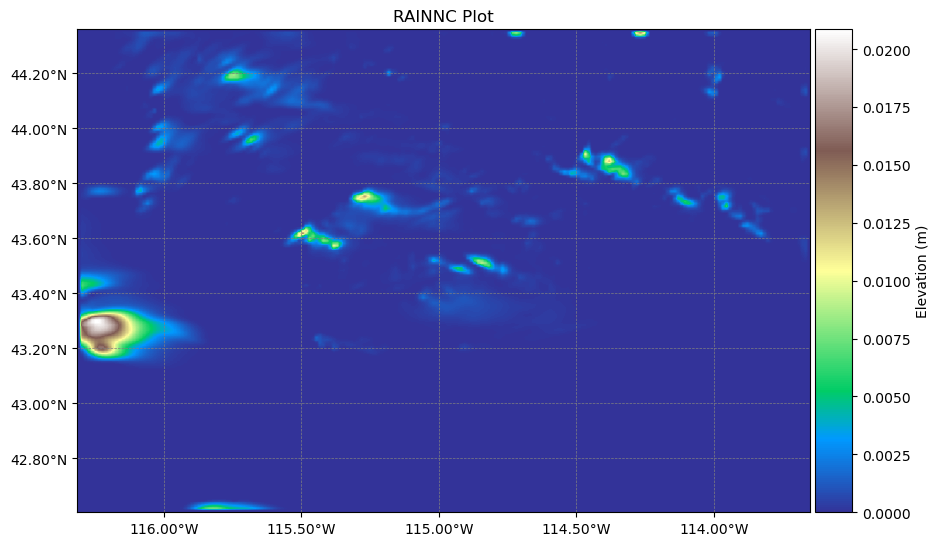

In [92]:
# Open the wrfout file
wrf_data = xr.open_dataset("wrfout_d02_2022-12-31_07:00:00")

# Extract the elevation variable
elevation = wrf_data['RAINNC'].isel(Time=0)  # Assuming 'HGT' is the elevation variable

# Extract latitude and longitude dimensions
lat = wrf_data['XLAT'].isel(Time=0)
lon = wrf_data['XLONG'].isel(Time=0)


fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(elevation, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='terrain', origin='lower', alpha=1.0)

#im = ax.imshow(elevation, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='terrain', origin='lower', norm=LogNorm())
plt.title('RAINNC Plot')

# Modify latitude and longitude labels
lon_ticks = ax.get_xticks()
lat_ticks = ax.get_yticks()
lon_labels = [f'{abs(lon):.2f}°{"W" if lon < 0 else "E"}' for lon in lon_ticks]
lat_labels = [f'{abs(lat):.2f}°{"S" if lat < 0 else "N"}' for lat in lat_ticks]
ax.set_xticklabels(lon_labels)
ax.set_yticklabels(lat_labels)

# Add gridlines
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Create a colorbar with the same height as the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, cax=cax, label='Elevation (m)')

# Save the plot to a file
plt.savefig('elevation_plot.pdf', dpi=300)

# Display the plot
plt.show()

In [36]:
%%bash
du -h output.nc

449K	output.nc


## SUBSET DATA

In [42]:
import subprocess

# Specify the directory path containing the wrfout files
directory = '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2'

# Get a list of wrfout files in the directory
sorted_files = sorted(glob.glob(directory + '/wrfout_d02*'))


# Concatenate the sorted files using ncecat
subprocess.run(["ncrcat"] + sorted_files + ["-O", "concatenated.nc"])


CompletedProcess(args=['ncrcat', '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2/wrfout_d02_2022-12-31_06:00:00', '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2/wrfout_d02_2022-12-31_07:00:00', '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2/wrfout_d02_2022-12-31_08:00:00', '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2/wrfout_d02_2022-12-31_09:00:00', '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2/wrfout_d02_2022-12-31_10:00:00', '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2/wrfout_d02_2022-12-31_11:00:00', '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2/wrfout_d02_2022-12-31_12:00:00', '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2/wrfout_d02_2022-12-31_13:00:00', '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2/wrfout_d02_2022-12-31_14:00:00', '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2/wrfout_d02_2022-12-31_15:00:00', '/bsuhome/stanley

In [43]:
input_file = "concatenated.nc"
output_file = "output_file.nc"
variables = "P,HGT,RAINNC,RAINC,SNOWH"

# Construct the command
command = f"ncks -v {variables} {input_file} -O {output_file}"

# Execute the command
subprocess.run(command, shell=True)

CompletedProcess(args='ncks -v P,HGT,RAINNC,RAINC,SNOWH concatenated.nc -O output_file.nc', returncode=0)

In [63]:
wrf_data = xr.open_dataset("output_file.nc")


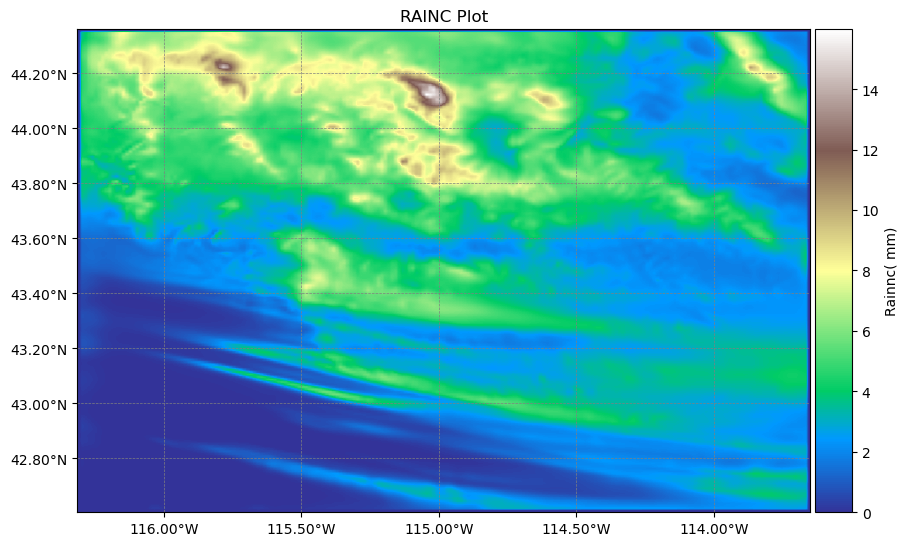

In [121]:
# Open the wrfout file
wrf_data = xr.open_dataset("output_file.nc")

# # Extract the elevationžvariable
elevation = wrf_data['RAINNC'].isel(Time=10)  # Assuming 'HGT' is the elevation variable

# Extract latitude and longitude dimensions
lat = wrf_data['XLAT'].isel(Time=0)
lon = wrf_data['XLONG'].isel(Time=0)


fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(elevation, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='terrain', origin='lower', alpha=1.0)

#im = ax.imshow(elevation, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='terrain', origin='lower', norm=LogNorm())

plt.title('RAINC Plot')

# # Modify latitude and longitude labels
lon_ticks = ax.get_xticks()
lat_ticks = ax.get_yticks()
lon_labels = [f'{abs(lon):.2f}°{"W" if lon < 0 else "E"}' for lon in lon_ticks]
lat_labels = [f'{abs(lat):.2f}°{"S" if lat < 0 else "N"}' for lat in lat_ticks]
ax.set_xticklabels(lon_labels)
ax.set_yticklabels(lat_labels)

# Add gridlines
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Create a colorbar with the same height as the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, cax=cax, label='Rainnc( mm)')

# Save the plot to a file
plt.savefig('rainnc_plot.pdf', dpi=300)

# # Display the plot
plt.show()

In [122]:
# Open the wrfout file
wrf_data = xr.open_dataset("output_file.nc")

# # Extract the elevationžvariable
elevation = wrf_data['RAINNC']#.isel(Time=10)  # Assuming 'HGT' is the elevation variable

In [ ]:
lat1 = 43.0
lon1 = -116.0


In [127]:
p=elevation.sel(south_north = 23, west_east = 10)

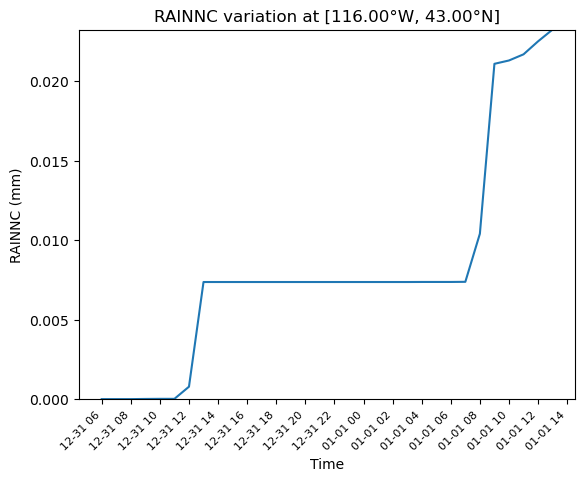

In [142]:
fig, ax = plt.subplots()
ax.plot(p.XTIME, p)

# Rotate the x-axis tick labels diagonally
plt.xticks(rotation=45, ha='right')


# Customize x-axis labels

plt.xlabel('Time')
plt.ylabel('RAINNC (mm)')

# Set the y-axis limits
plt.ylim(p.min(),p.max())  # Example limits, adjust as needed



# Add titles
ax = plt.gca()
ax.tick_params(axis='x', labelsize=8)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.title("RAINNC variation at [{:.2f}°{}, {:.2f}°{}]".format(abs(lon1),\
         "W" if lon1 < 0 else "E", abs(lat1), "S" if lat1 < 0 else "N"))
plt.show()



In [89]:
%%bash
du -h output_file.nc

155M	output_file.nc
